In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


D:\Anacoda\lib\site-packages\scipy\__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1. Đọc dữ liệu

In [ ]:
df = pd.read_csv('CC GENERAL.csv')

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

CUST_ID: ID CUST <br>
BALANCE: SỐ DƯ<br>
BALANCE_FREQUENCY: TẦN SUẤT SỐ DƯ<br>
PURCHASES: MUA<br>
ONEOFF_PURCHASES: MUA MỘT LẦN<br>
INSTALLMENTS_PURCHASES: MUA LẮP<br>
CASH_ADVANCE: TẦN SUẤT TIỀN MẶT<br>
PURCHASES_FREQUENCY: TẦN SUẤT MUA<br>
ONEOFF_PURCHASES_FREQUENCY: TẦN SUẤT MUA MỘT LẦN<br>
PURCHASES_INSTALLMENTS_FREQUENCY: TẦN SUẤT MUA LẮP ĐẶT<br>
CASH_ADVANCE_FREQUENCY: TẦN SUẤT TRƯỚC TIỀN MẶT<br>
CASH_ADVANCE_TRX: TRX TIỀN MẶT<br>
PURCHASES_TRX: TRX MUA<br>
CREDIT_LIMIT: GIỚI HẠN TÍN DỤNG<br>
PAYMENTS: P THANH TOÁN<br>
MINIMUM_PAYMENTS: THANH TOÁN TỐI THIỂU<br>
PRC_FULL_PAYMENT: PRC THANH TOÁN ĐẦY ĐỦ<br>
TENURE: THỜI HẠN<br>


In [ ]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# 2. Làm sạch dữ liệu

In [ ]:
df[df['MINIMUM_PAYMENTS'].isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [ ]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df.dropna(axis = 0 , inplace = True)
# Xoá những dòng thiếu dữ liệu

In [ ]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['CUST_ID'].duplicated().sum()

0

# 3. Phân nhóm khách hàng dùng chỉ số RFM

## RECENCY

In [ ]:
recency = df[['CUST_ID','TENURE']].rename(columns={'TENURE': 'Recency'})

In [ ]:
recency.head()

,CUST_ID,Recency
0,C10001,12
1,C10002,12
2,C10003,12
4,C10005,12
5,C10006,12


<AxesSubplot:xlabel='Recency', ylabel='Count'>

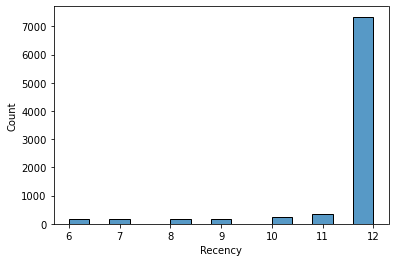

In [ ]:
sns.histplot(data=recency, x='Recency')

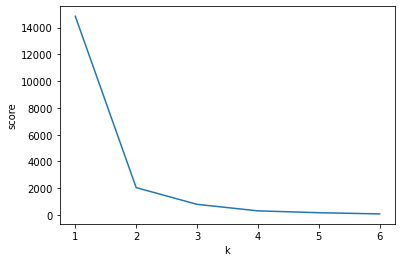

In [ ]:
# Sử dụng phương pháp Elbow để xấp xỉ số lượng cụm.
X = recency[['Recency']].values

# Tính tổng khoảng cách từ từng data đến centroid tương ứng
# Số WWCS càng nhỏ --> Các data ở rất gần centroid mà nó thuộc về

wcss = []
k_values = range(1, 7)

for i in k_values:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(k_values, wcss)
plt.xlabel('k')
plt.xticks(range(1, 7))
plt.ylabel('score');

In [ ]:
# Gọi, fit mô hình KMeans và chạy dự đoán để xác định cụm của từng khách hàng.
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)

In [ ]:
recency['RecencyCluster'] = clusters
recency.head()

,CUST_ID,Recency,RecencyCluster
0,C10001,12,0
1,C10002,12,0
2,C10003,12,0
4,C10005,12,0
5,C10006,12,0


In [ ]:
recency.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,7928.0,11.898083,0.385437,10.0,12.0,12.0,12.0,12.0
1,708.0,7.461864,1.110558,6.0,6.0,7.0,8.0,9.0


In [ ]:
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    """Rearange cluster in such order that the higher the recency, the less the value
       that customer brings to us, so higher recency should result in a lower score."""

    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})

    return df_final

In [ ]:
recency= order_cluster('RecencyCluster','Recency',recency,True)

In [ ]:
recency.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,708.0,7.461864,1.110558,6.0,6.0,7.0,8.0,9.0
1,7928.0,11.898083,0.385437,10.0,12.0,12.0,12.0,12.0


Với những khách hàng có thời hạn dài(mới sử dụng gần đây) sẽ đạt điểm số cao hơn

## FREQUENCY

In [ ]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.00,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.00,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.00,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.00,0,3,11000.0,1164.770591,100.302262,0.000000,12
10,C10011,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.00,0,12,1200.0,1083.301007,2172.697765,0.000000,12


In [ ]:
frequency = df[['CUST_ID','PURCHASES']].rename(columns={'PURCHASES': 'Frequency'})
frequency.head()

,CUST_ID,Frequency
0,C10001,95.40
1,C10002,0.00
2,C10003,773.17
4,C10005,16.00
5,C10006,1333.28


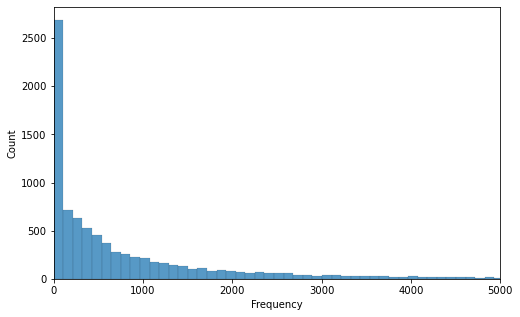

In [ ]:
plt.figure(figsize= (8,5))
sns.histplot(data=frequency, x='Frequency')
plt.xlim(0, 5000)
plt.show()

In [ ]:
X = frequency[['Frequency']].values

In [ ]:
# Dùng phương pháp Elbow
k_range = range(1, 20)

wcss = []
for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

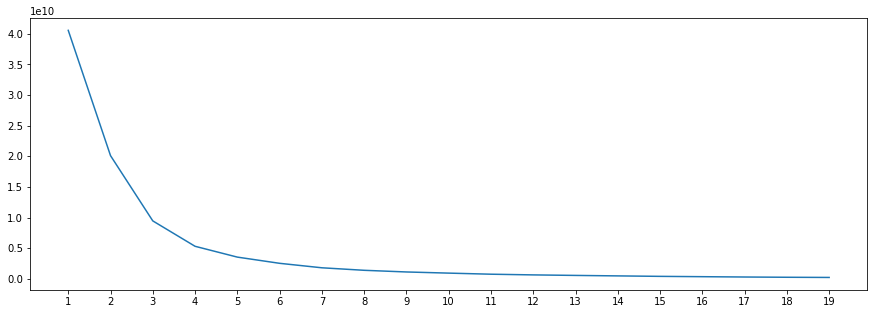

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(k_range, wcss)
plt.xticks(k_range)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

In [ ]:
frequency['FrequencyCluster'] = clusters
frequency

,CUST_ID,Frequency,FrequencyCluster
0,C10001,95.40,0
1,C10002,0.00,0
2,C10003,773.17,0
4,C10005,16.00,0
5,C10006,1333.28,0
...,...,...,...
8943,C19184,20.90,0
8945,C19186,291.12,0
8947,C19188,144.40,0
8948,C19189,0.00,0


In [ ]:
frequency.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,7902.0,569.028419,684.593039,0.00,4.5300,306.305,858.8975,2884.42
1,710.0,5203.667028,2447.401115,2893.57,3503.4275,4375.310,5893.9450,15704.04
2,24.0,27690.865833,8068.491163,17409.21,22078.8150,26008.730,31609.4575,49039.57


In [ ]:
frequency = order_cluster('FrequencyCluster','Frequency',frequency,True)
frequency.head()

,CUST_ID,Frequency,FrequencyCluster
0,C10001,95.40,0
1,C10002,0.00,0
2,C10003,773.17,0
3,C10005,16.00,0
4,C10006,1333.28,0


In [ ]:
frequency.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,7902.0,569.028419,684.593039,0.00,4.5300,306.305,858.8975,2884.42
1,710.0,5203.667028,2447.401115,2893.57,3503.4275,4375.310,5893.9450,15704.04
2,24.0,27690.865833,8068.491163,17409.21,22078.8150,26008.730,31609.4575,49039.57


Số lần mua hàng càng nhiều thì điểm số càng lớn

## REVENUE

In [ ]:
revenue = df[['CUST_ID','PAYMENTS']].rename(columns={'PAYMENTS': 'Revenue'})
revenue.head()

,CUST_ID,Revenue
0,C10001,201.802084
1,C10002,4103.032597
2,C10003,622.066742
4,C10005,678.334763
5,C10006,1400.057770


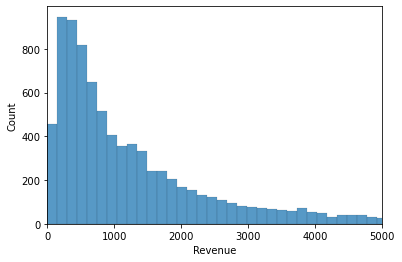

In [ ]:
# Vẽ biểu đồ histogram cho Doanh thu
sns.histplot(data=revenue, x='Revenue')
plt.xlim(0, 5000)
plt.show()

In [ ]:
k_range = range(1, 20)

wcss = []
for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

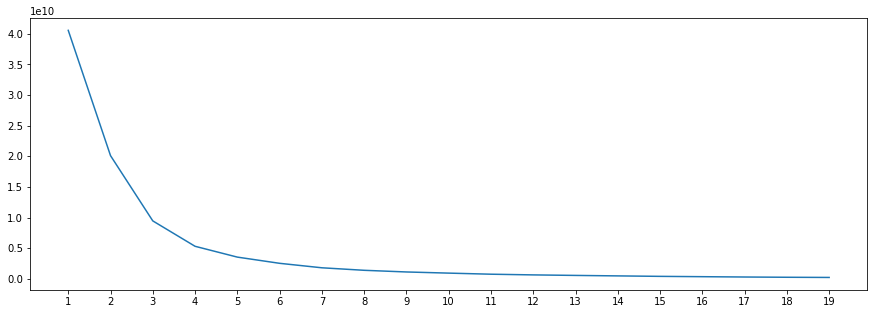

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(k_range, wcss)
plt.xticks(k_range)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster = kmeans.fit_predict(X)


In [ ]:
revenue['RevenueCluster'] = cluster

In [ ]:
revenue.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,7902.0,1420.990588,2170.745140,0.049513,386.384569,791.654906,1625.255485,40627.59524
1,710.0,4978.602213,3779.954641,105.220502,2691.637374,3968.070699,6039.433235,31698.41902
2,24.0,26969.902881,9870.016554,8760.860264,21848.541055,26191.211030,31020.443182,50721.48336


In [ ]:
revenue = order_cluster('RevenueCluster', 'Revenue', revenue, True)
revenue.head()

,CUST_ID,Revenue,RevenueCluster
0,C10001,201.802084,0
1,C10002,4103.032597,0
2,C10003,622.066742,0
3,C10005,678.334763,0
4,C10006,1400.057770,0


In [ ]:
revenue.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,7902.0,1420.990588,2170.745140,0.049513,386.384569,791.654906,1625.255485,40627.59524
1,710.0,4978.602213,3779.954641,105.220502,2691.637374,3968.070699,6039.433235,31698.41902
2,24.0,26969.902881,9870.016554,8760.860264,21848.541055,26191.211030,31020.443182,50721.48336


Doanh thu từ mỗi khách hàng càng lớn thì điểm số càng cao

## RFM SCORE

In [ ]:
recency

,CUST_ID,Recency,RecencyCluster
0,C10001,12,1
1,C10002,12,1
2,C10003,12,1
3,C10005,12,1
4,C10006,12,1
...,...,...,...
8631,C19184,6,0
8632,C19186,6,0
8633,C19188,6,0
8634,C19189,6,0


In [ ]:
frequency

,CUST_ID,Frequency,FrequencyCluster
0,C10001,95.40,0
1,C10002,0.00,0
2,C10003,773.17,0
3,C10005,16.00,0
4,C10006,1333.28,0
...,...,...,...
8631,C14338,17945.00,2
8632,C14400,20747.34,2
8633,C15407,22500.00,2
8634,C15510,22101.78,2


In [ ]:
final_rfm = pd.merge(recency[['CUST_ID', 'Recency', 'RecencyCluster']], frequency, on='CUST_ID')
final_rfm = pd.merge(final_rfm, revenue, on='CUST_ID')
final_rfm.head()

,CUST_ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,C10001,12,1,95.40,0,201.802084,0
1,C10002,12,1,0.00,0,4103.032597,0
2,C10003,12,1,773.17,0,622.066742,0
3,C10005,12,1,16.00,0,678.334763,0
4,C10006,12,1,1333.28,0,1400.057770,0


In [ ]:
final_rfm['RFM_score'] = final_rfm['RecencyCluster'] + final_rfm['FrequencyCluster'] + final_rfm['RevenueCluster']
final_rfm.sample(10)

,CUST_ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,RFM_score
1433,C11651,12,1,537.51,0,478.875501,0,1
6647,C17484,12,1,53.90,0,330.888649,0,1
8343,C17582,6,0,57.00,0,118.438703,0,0
3213,C13600,12,1,0.00,0,2580.477360,0,1
643,C10743,12,1,0.00,0,2322.058763,0,1
2987,C13352,12,1,182.10,0,231.561711,0,1
2577,C12904,12,1,7786.40,1,7328.487542,1,3
5187,C15817,12,1,135.28,0,212.020939,0,1
5018,C15629,12,1,2908.35,1,763.750978,1,3
5153,C15778,12,1,259.59,0,682.334296,0,1


In [ ]:
final_rfm['RFM_score'].value_counts()


1    7208
3     696
0     694
5      24
2      14
Name: RFM_score, dtype: int64

In [ ]:
final_rfm.groupby('RFM_score')[['Recency', 'Frequency', 'Revenue']].mean()


,Recency,Frequency,Revenue
RFM_score,,,
0,7.466859,409.433703,814.082067
1,11.892342,584.394503,1479.424899
2,7.214286,4303.218571,3316.497895
3,11.956897,5221.779497,5012.035346
5,11.916667,27690.865833,26969.902881


# 4. Kết luận

In [ ]:
final_rfm['Segmentation'] = 'Low'
final_rfm.loc[final_rfm['RFM_score'] > 1, 'Segmentation'] = 'Mid'
final_rfm.loc[final_rfm['RFM_score'] > 3, 'Segmentation'] = 'High'

- Từ 0 - 1, khách hàng giá trị thấp
- Từ 2 - 3, khách hàng giá trị trung bình  
- Từ 5, khách hàng giá trị cao

In [ ]:
final_rfm['Segmentation'].value_counts()

Low     7902
Mid      710
High      24
Name: Segmentation, dtype: int64

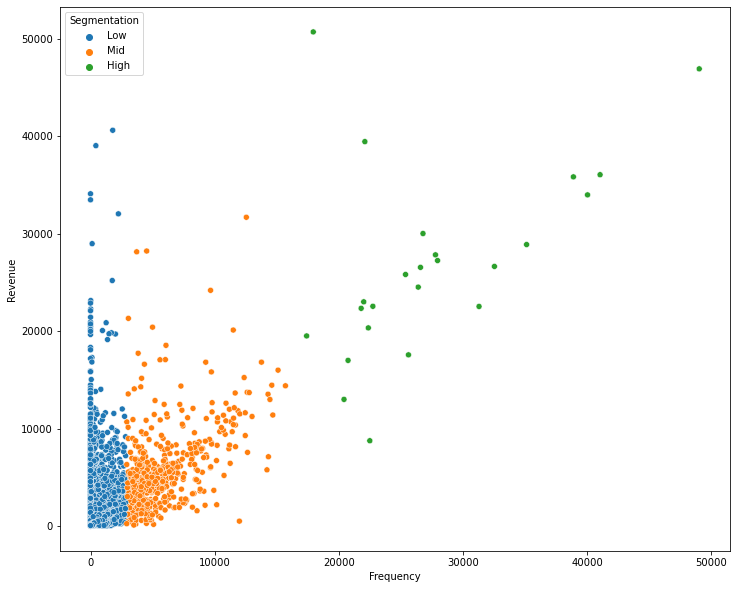

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=final_rfm,
                x="Frequency", y="Revenue", hue="Segmentation")
plt.show()

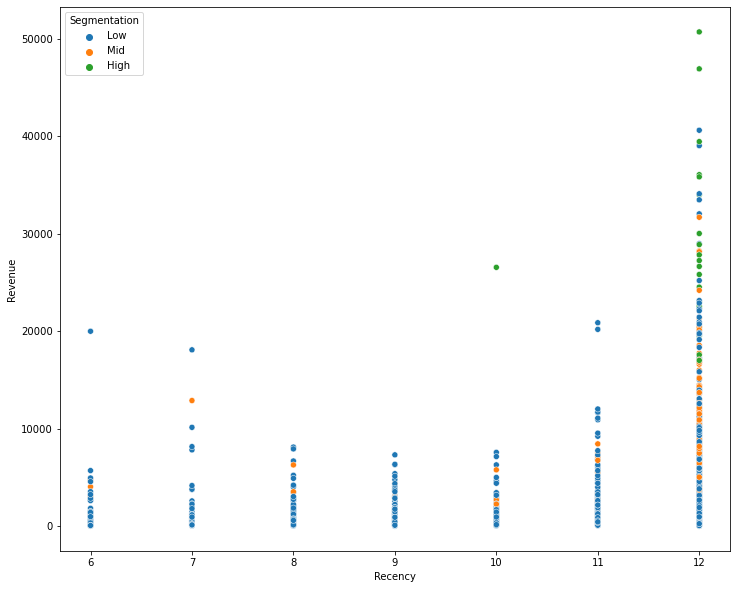

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=final_rfm,
                x="Recency", y="Revenue", hue="Segmentation")
plt.show()

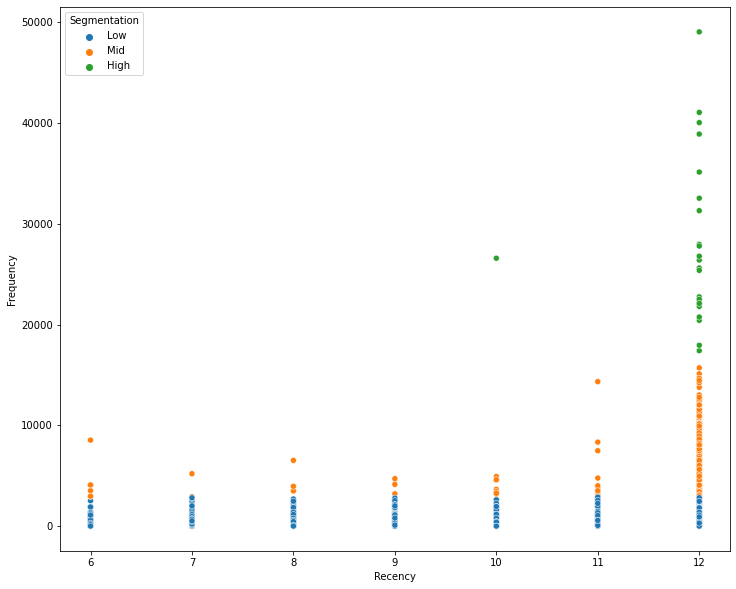

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=final_rfm,
                x="Recency",
                y="Frequency",
                hue="Segmentation")
plt.show()